In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Load the CSV assuming there's no header row
df = pd.read_csv(r'C:\Users\zelaskar\Downloads\data.csv', header=None)

# Rename columns
df.columns = ['x1', 'x2', 'label']

# Verify it worked
print(df.head())


df.columns = ['x1', 'x2', 'label']
X = df[['x1', 'x2']].values
y = df['label'].values



        x1        x2  label
0  0.78051 -0.063669      1
1  0.28774  0.291390      1
2  0.40714  0.178780      1
3  0.29230  0.421700      1
4  0.50922  0.352560      1


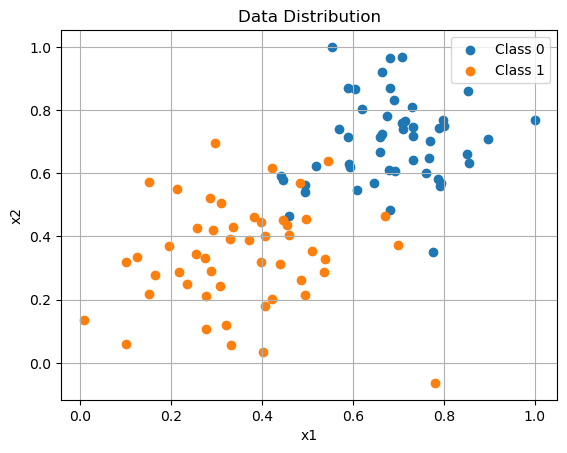

In [3]:
# Plot the data
for label in np.unique(y):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Data Distribution')
plt.grid(True)
plt.show()


In [4]:
# Convert labels if needed (Perceptron expects 0 or 1 — you're already using that)
def sign(x):
    return 1 if x >= 0 else 0

# Heuristic Perceptron Implementation
def perceptron_heuristic(X, y, learning_rate=0.1, max_iter=100):
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    w = np.random.rand(X.shape[1])
    lines = [w.copy()]

    for _ in range(max_iter):
        error_count = 0
        for xi, target in zip(X, y):
            prediction = sign(np.dot(xi, w))
            if prediction != target:
                error_count += 1
                w += learning_rate * (target - prediction) * xi
        lines.append(w.copy())
        if error_count == 0:
            break
    return lines

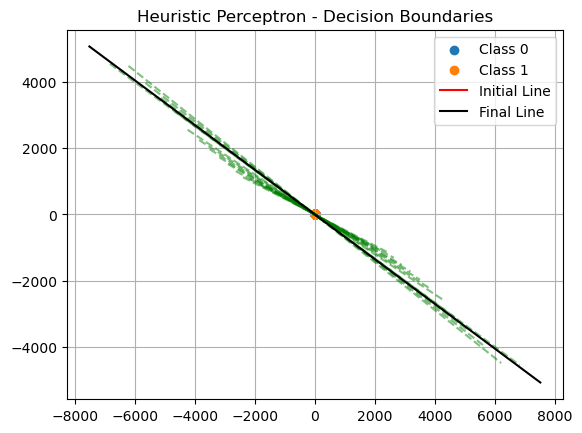

In [5]:


# Plot decision boundaries
def plot_decision_lines(X, y, lines):
    for label in set(y):
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}')

    for idx, w in enumerate(lines):
        x_vals = np.array(plt.gca().get_xlim())
        y_vals = -(w[1] * x_vals + w[0]) / w[2]
        if idx == 0:
            plt.plot(x_vals, y_vals, 'r-', label='Initial Line')
        elif idx == len(lines) - 1:
            plt.plot(x_vals, y_vals, 'k-', label='Final Line')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.5)

    plt.legend()
    plt.grid(True)
    plt.title("Heuristic Perceptron - Decision Boundaries")
    plt.show()

# ✅ Run the perceptron and plot the results
lines = perceptron_heuristic(X, y, learning_rate=0.1, max_iter=100)
plot_decision_lines(X, y, lines)

In [6]:
# Step 2: Functions for Gradient Descent Perceptron
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_log_loss(y_true, y_pred):
    epsilon = 1e-10  # Numerical stability
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

def perceptron_gradient_descent(X, y, learning_rate=0.1, epochs=100):
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
    w = np.random.rand(X.shape[1])
    loss_list = []
    lines = [w.copy()]

    for epoch in range(epochs):
        z = np.dot(X, w)
        predictions = sigmoid(z)
        gradient = np.dot(X.T, (predictions - y)) / y.size
        w -= learning_rate * gradient

        if epoch % 10 == 0:
            loss = compute_log_loss(y, predictions)
            loss_list.append((epoch, loss))
            lines.append(w.copy())

    lines.append(w.copy())  # Final line
    return lines, loss_list







In [7]:
# Step 3: Plot Decision Boundaries
def plot_decision_lines(X, y, lines):
    for label in set(y):
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f'Class {label}')

    for idx, w in enumerate(lines):
        x_vals = np.array(plt.gca().get_xlim())
        y_vals = -(w[1] * x_vals + w[0]) / w[2]
        if idx == 0:
            plt.plot(x_vals, y_vals, 'r-', label='Initial Line')
        elif idx == len(lines) - 1:
            plt.plot(x_vals, y_vals, 'k-', label='Final Line')
        else:
            plt.plot(x_vals, y_vals, 'g--', alpha=0.5)

    plt.legend()
    plt.grid(True)
    plt.title("Gradient Descent Perceptron - Decision Boundaries")
    plt.show()

In [11]:
# Step 4: Plot Loss Curve
def plot_loss_curve(loss_list):
    epochs, losses = zip(*loss_list)
    plt.plot(epochs, losses, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Log Loss')
    plt.title('Loss Curve (Every 10 Epochs)')
    plt.grid(True)
    plt.show()

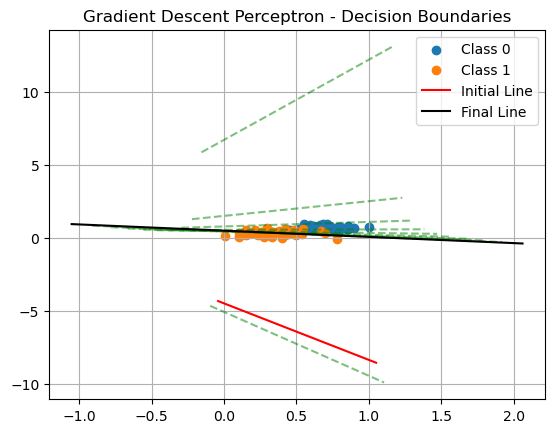

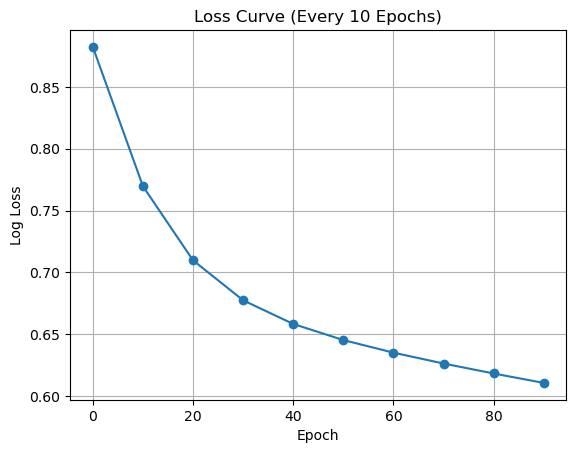

In [12]:
# Step 5: Run everything 
lines, loss_list = perceptron_gradient_descent(X, y, learning_rate=0.1, epochs=100)
plot_decision_lines(X, y, lines)
plot_loss_curve(loss_list)